In [3]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [16]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5,1,'Ground Truth : 9')

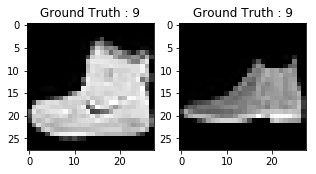

In [17]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [18]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [19]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [20]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


In [21]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [22]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [23]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
#from keras.layers.advanced_activations import LeakyReLU

In [24]:
batch_size = 64
epochs = 13
num_classes = 10

In [25]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(Activation('relu'))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(Activation('relu'))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(Activation('relu'))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(Activation('relu'))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [26]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [27]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         73856     
__________

In [28]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/13
48000/48000 [==============================] - 169s 4ms/step - loss: 0.4821 - acc: 0.8234 - val_loss: 0.3380 - val_acc: 0.8758
Epoch 2/13
48000/48000 [==============================] - 173s 4ms/step - loss: 0.3066 - acc: 0.8873 - val_loss: 0.2938 - val_acc: 0.8941
Epoch 3/13
48000/48000 [==============================] - 171s 4ms/step - loss: 0.2607 - acc: 0.9037 - val_loss: 0.2652 - val_acc: 0.9021
Epoch 4/13
48000/48000 [==============================] - 174s 4ms/step - loss: 0.2276 - acc: 0.9158 - val_loss: 0.2459 - val_acc: 0.9137
Epoch 5/13
48000/48000 [==============================] - 184s 4ms/step - loss: 0.2027 - acc: 0.9254 - val_loss: 0.2361 - val_acc: 0.9149
Epoch 6/13
48000/48000 [==============================] - 186s 4ms/step - loss: 0.1788 - acc: 0.9331 - val_loss: 0.2604 - val_acc: 0.9081
Epoch 7/13
48000/48000 [==============================] - 186s 4ms/step - loss: 0.1596 - acc: 0.9389 - val_loss: 0.2371 - 

In [29]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.292408364516
Test accuracy: 0.915


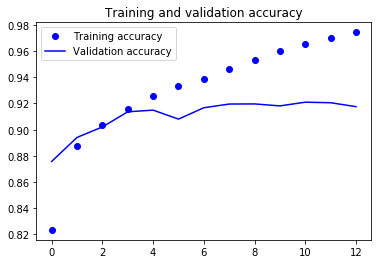

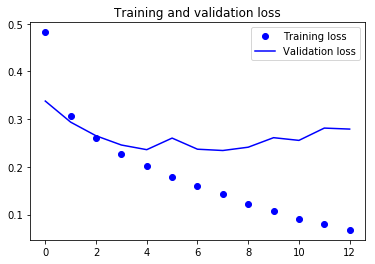

In [30]:
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [31]:
fashion_model.save("fashion_model_Nodropout.py")

In [47]:
batch_size = 64
epochs = 13
num_classes = 10

In [43]:
fashion_model2 = Sequential()
fashion_model2.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(Activation('relu'))
fashion_model2.add(MaxPooling2D((2, 2),padding='same'))
fashion_model2.add(Dropout(0.25))
fashion_model2.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(Activation('relu'))
fashion_model2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model2.add(Dropout(0.25))
fashion_model2.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(Activation('relu'))
fashion_model2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model2.add(Dropout(0.4))
fashion_model2.add(Flatten())
fashion_model2.add(Dense(128, activation='linear'))
fashion_model.add(Activation('relu'))
fashion_model2.add(Dropout(0.3))
fashion_model2.add(Dense(num_classes, activation='softmax'))

In [44]:
fashion_model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 128)         73856     
__________

In [45]:
fashion_model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [46]:
fashion_train_dropout = fashion_model2.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/13
48000/48000 [==============================] - 182s 4ms/step - loss: 0.5658 - acc: 0.7968 - val_loss: 0.3704 - val_acc: 0.8665
Epoch 2/13
48000/48000 [==============================] - 186s 4ms/step - loss: 0.3848 - acc: 0.8620 - val_loss: 0.3087 - val_acc: 0.8898
Epoch 3/13
48000/48000 [==============================] - 187s 4ms/step - loss: 0.3477 - acc: 0.8758 - val_loss: 0.3028 - val_acc: 0.8908
Epoch 4/13
48000/48000 [==============================] - 184s 4ms/step - loss: 0.3280 - acc: 0.8846 - val_loss: 0.2752 - val_acc: 0.9025
Epoch 5/13
48000/48000 [==============================] - 183s 4ms/step - loss: 0.3076 - acc: 0.8891 - val_loss: 0.2720 - val_acc: 0.9038
Epoch 6/13
48000/48000 [==============================] - 175s 4ms/step - loss: 0.2965 - acc: 0.8944 - val_loss: 0.2753 - val_acc: 0.9008
Epoch 7/13
48000/48000 [==============================] - 179s 4ms/step - loss: 0.2887 - acc: 0.8964 - val_loss: 0.2753 - 

In [48]:
fashion_model2.save("fashion_model_dropout.py")

In [49]:
test_eval = fashion_model2.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

10000/10000 [==============================] - 11s 1ms/step
Test loss: 0.260889044017
Test accuracy: 0.9091


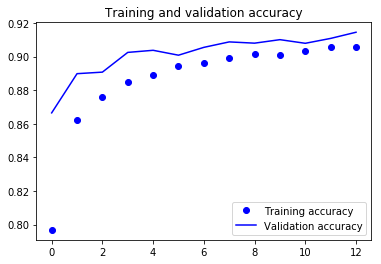

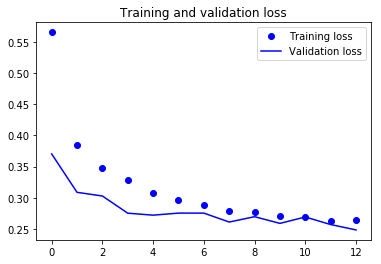

In [50]:
accuracy = fashion_train_dropout.history['acc']
val_accuracy = fashion_train_dropout.history['val_acc']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()